# Genome-scale metabolic models

## Preparation

In [3]:
from cobra.io import read_sbml_model
model = read_sbml_model('data/iJO1366.xml.gz')

## What is in a genome-scale metabolic model?

### Metabolites

The model contains a list of metabolites. Here are the first ten.

In [2]:
model.metabolites[0:10]

[<Metabolite 10fthf_c at 0x113f21d30>,
 <Metabolite 12dgr120_c at 0x11bbacd68>,
 <Metabolite 12dgr140_c at 0x1137fb208>,
 <Metabolite 12dgr141_c at 0x1104420b8>,
 <Metabolite 12dgr160_c at 0x1181a5128>,
 <Metabolite 12dgr161_c at 0x110442c18>,
 <Metabolite 12dgr180_c at 0x11bbdd0f0>,
 <Metabolite 12dgr181_c at 0x11bbdd128>,
 <Metabolite 12ppd__R_c at 0x11bbdd198>,
 <Metabolite 12ppd__S_c at 0x11bbdd2b0>]

There are 1805 metabolites in the model.

In [3]:
len(model.metabolites)

1805

One can access a specific metabolite using dot notation.

In [4]:
model.metabolites.g3p_c

Metabolite identifier,g3p_c
Name,Glyceraldehyde 3-phosphate
Memory address,0x011bd425c0
Formula,C3H5O6P
Compartment,c
In 14 reaction(s),"TKT1, TRPS3, DXPS, TKT2, DRPA, DDPGALA, TRPS1, EDA, F6PA, TGBPA, TALA, FBA, GAPD, TPI"


<div class="alert alert-warning">

**Warning:** One cannot use dot notation to access metabolites, reactions, or genes if their identifiers do not resemble proper Python variable names.

</div>

In [1]:
# the line below results in an error, uncomment to try
# model.metabolites.10fthf_c


#  File "<ipython-input-5-2772b042e9ed>", line 1
#     model.metabolites.10fthf_c
#                        ^
# SyntaxError: invalid syntax

<div class="alert alert-success">

**Solution:** Use the method `get_by_id` instead!

</div>

In [6]:
model.metabolites.get_by_id('10fthf_c')

Metabolite identifier,10fthf_c
Name,10-Formyltetrahydrofolate
Memory address,0x0113f21d30
Formula,C20H21N7O7
Compartment,c
In 9 reaction(s),"ULA4NFT, GARFT, FTHFD, FMETTRS, FTHFLi, AICART, BIOMASS_Ec_iJO1366_WT_53p95M, MTHFC, BIOMASS_Ec_iJO1366_core_53p95M"


Metabolites are associated with compartments in the cell. Glyceraldehyde 3-phosphate (`g3p_c`) is associated with the `c` (Cytosol) compartment.

In [7]:
model.metabolites.g3p_c.compartment

'c'

The _E. coli_ model has three compartments.

In [8]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

Some metabolites (like Glucose for example) can be associated with multiple compartments.

In [9]:
model.metabolites.glc__D_c.compartment

'c'

In [10]:
model.metabolites.glc__D_p.compartment

'p'

The full name of the metabolite is available via the `.name` attribute. 

In [11]:
model.metabolites.glc__D_c.name

'D-Glucose'

One can look up the molecular formula of glucose.

In [12]:
model.metabolites.g3p_c.formula

'C3H5O6P'

The `.elements` attribute returns a dictionary representation of the formula.

In [13]:
model.metabolites.g3p_c.elements

{'C': 3, 'H': 5, 'O': 6, 'P': 1}

Furthermore, one can look up the molecular weight of a metabolite.

In [14]:
model.metabolites.g3p_c.formula_weight

168.041961

One can gather additional information (like references to external datbases) about the metabolite through the annotation attribute.

In [15]:
model.metabolites.g3p_c.annotation

{'SBO': 'SBO:0000247',
 'bigg.metabolite': 'g3p',
 'biocyc': 'META:GAP',
 'chebi': ['CHEBI:12983',
  'CHEBI:12984',
  'CHEBI:14333',
  'CHEBI:17138',
  'CHEBI:181',
  'CHEBI:18324',
  'CHEBI:21026',
  'CHEBI:29052',
  'CHEBI:5446',
  'CHEBI:58027',
  'CHEBI:59776'],
 'hmdb': 'HMDB01112',
 'kegg.compound': ['C00118', 'C00661'],
 'metanetx.chemical': 'MNXM2378',
 'reactome': '29578',
 'seed.compound': 'cpd00102',
 'unipathway.compound': ['UPC00118', 'UPC00661']}

One can use these annotations to look up the compound on [KEGG](http://www.genome.jp/dbget-bin/www_bget?cpd:C00118) for example.

Metabolites are not isolated things. They participate in reactions as substrates and products.

In [16]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction TKT1 at 0x11caec080>,
           <Reaction TRPS3 at 0x11cb02080>,
           <Reaction DXPS at 0x11c5facf8>,
           <Reaction TKT2 at 0x11cae1dd8>,
           <Reaction DRPA at 0x11c5f01d0>,
           <Reaction DDPGALA at 0x11c5b9208>,
           <Reaction TRPS1 at 0x11cb02208>,
           <Reaction EDA at 0x11c61aa20>,
           <Reaction F6PA at 0x11c632240>,
           <Reaction TGBPA at 0x11cac9ac8>,
           <Reaction TALA at 0x11cabc6d8>,
           <Reaction FBA at 0x11c6502e8>,
           <Reaction GAPD at 0x11c6e9710>,
           <Reaction TPI at 0x11cafa390>})

### Reactions

The model contains a list of reactions. Here are the first 10 of them.

In [17]:
model.reactions[0:10]

[<Reaction DM_4crsol_c at 0x11c30d5f8>,
 <Reaction DM_5drib_c at 0x11c30d710>,
 <Reaction DM_aacald_c at 0x11c30d908>,
 <Reaction DM_amob_c at 0x11c30d978>,
 <Reaction DM_mththf_c at 0x11c30d9b0>,
 <Reaction DM_oxam_c at 0x11c30da58>,
 <Reaction BIOMASS_Ec_iJO1366_WT_53p95M at 0x11c30da90>,
 <Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x11c30db38>,
 <Reaction EX_12ppd__R_e at 0x11c30df98>,
 <Reaction EX_12ppd__S_e at 0x11c30dc50>]

There are 2583 reactions in the model.

In [18]:
len(model.reactions)

2583

Let's take a closer look at the reactions associated with Glyceraldehyde 3-phosphate (`g3p`).

In [19]:
for reaction in model.metabolites.g3p_c.reactions:
    print(reaction, reaction.name)

TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c Transketolase
TRPS3: 3ig3p_c --> g3p_c + indole_c Tryptophan synthase (indoleglycerol phosphate)
DXPS: g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c 1-deoxy-D-xylulose 5-phosphate synthase
TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c Transketolase
DRPA: 2dr5p_c --> acald_c + g3p_c Deoxyribose-phosphate aldolase
DDPGALA: 2dh3dgal6p_c <=> g3p_c + pyr_c 2-dehydro-3-deoxy-6-phosphogalactonate aldolase
TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c Tryptophan synthase (indoleglycerol phosphate)
EDA: 2ddg6p_c --> g3p_c + pyr_c 2-dehydro-3-deoxy-phosphogluconate aldolase
F6PA: f6p_c <=> dha_c + g3p_c Fructose 6-phosphate aldolase
TGBPA: tagdp__D_c <=> dhap_c + g3p_c Tagatose-bisphosphate aldolase
TALA: g3p_c + s7p_c <=> e4p_c + f6p_c Transaldolase
FBA: fdp_c <=> dhap_c + g3p_c Fructose-bisphosphate aldolase
GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c Glyceraldehyde-3-phosphate dehydrogenase
TPI: dhap_c <=> g3p_c Triose-phosphate isomerase


The second reaction in this list is Glyceraldehyde-3-phosphate dehydrogenase (GAPD).

In [20]:
model.reactions.GAPD.name

'Glyceraldehyde-3-phosphate dehydrogenase'

A reaction has a flux expression, which in cobrapy is coded as the forward flux + the reverse flux (a convenient way to represent the mathematical problem).

In [26]:
model.reactions.GAPD.flux_expression

1.0*GAPD - 1.0*GAPD_reverse_459c1

### Genes and gene-protein-reaction associations

The model also contains genes (perhaps more appropriately gene products) and they belong to reactions.

In [4]:
model.genes[0:5]

[<Gene b2215 at 0x10e073160>,
 <Gene b1377 at 0x10e073208>,
 <Gene b0241 at 0x10e073438>,
 <Gene b0929 at 0x10e073668>,
 <Gene b4035 at 0x10e073898>]

In [5]:
model.genes.b1779.reactions

frozenset({<Reaction GAPD at 0x10e661080>, <Reaction E4PD at 0x10e56f898>})

The gapA (b1779) gene is the only one associated to reaction glyceraldehyde-3-phosphate dehydrogenase.

In [25]:
model.reactions.GAPD.gene_reaction_rule

'b1779'

Phosphofructokinase (PFK) on the other hand seems to be associated with to isozymes.

In [26]:
model.reactions.PFK.gene_reaction_rule

'b3916 or b1723'

One can display the gene names (typical 4 letter gene codes) instead of the identifiers (Blattner numbers in this case).

In [9]:
model.reactions.PFK.gene_name_reaction_rule

'pfkA or pfkB'

Reactions are functional if all genes are functional

In [11]:
model.reactions.PFK

Reaction identifier,PFK
Name,Phosphofructokinase
Memory address,0x010e902198
Stoichiometry,"atp_c + f6p_c --> adp_c + fdp_c + h_c ATP + D-Fructose 6-phosphate --> ADP + D-Fructose 1,6-bisphosphate + H+"
GPR,b3916 or b1723
Lower bound,0.0
Upper bound,1000.0


In [12]:
print(model.genes.b3916.functional, model.genes.b1723.functional, model.reactions.PFK.functional)

True True True


If we knock out one of the isozymes, the PFK reaction stays functional, but not if we knock both.

In [23]:
model_copy = model.copy()
model_copy.genes.b3916.knock_out()
print(model_copy.reactions.PFK.functional)

model_copy = model.copy()
model_copy.genes.b3916.knock_out()
model_copy.genes.b1723.knock_out()
print(model_copy.reactions.PFK.functional)

True
False


### Objective

In the iJO1366 model, the default objective is to maximize the flux through the biomass reaction (i.e. growth). 

In [27]:
print(model.objective)

Maximize
-1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1 + 1.0*BIOMASS_Ec_iJO1366_core_53p95M


### Querying

One can use `.query('search term', 'attribute_to_search_in')` to search in model metabolites, reactions, and genes. For example, one can search metabolites that contain the term _glucose_ in their name.

In [29]:
for metabolite in model.metabolites.query('glucose', 'name'):
    print(metabolite.name)

6-Acetyl-D-glucose
ADPglucose
DTDP-4-dehydro-6-deoxy-D-glucose
DTDPglucose
UDPglucose
UDPglucose
UDPglucose


## Simulating models with regular flux balance analysis (FBA)

In [32]:
model.optimize()

,fluxes,reduced_costs
DM_4crsol_c,2.1907e-04,0.0000
DM_5drib_c,2.2103e-04,0.0000
DM_aacald_c,0.0000e+00,0.0000
DM_amob_c,1.9647e-06,0.0000
DM_mththf_c,4.4010e-04,0.0000
...,...,...
ZN2abcpp,0.0000e+00,-0.0083
ZN2t3pp,0.0000e+00,-0.0021
ZN2tpp,3.3499e-04,0.0000
ZNabcpp,0.0000e+00,-0.0083


Sometimes a solution cannot be found. For example, setting the lower bound of the objective function to a very high value that the model cannot achieve will trigger a warning when trying to optimize the model. Parameters reported from an infeasible model are not meaningful to interpret (except in rare occasions when you may want to figure out why a model is infeasible).

In [33]:
infeasible_model = model.copy()
infeasible_model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.lower_bound = 100000
infeasible_model.optimize()

cobra/util/solver.py:419 UserWarning: solver status is 'infeasible'


<Solution infeasible at 0x1225ae198>

Mathematical solvers are now so fast that for computing the solution can be even faster than it takes to collect the values from the solver. If we are only interested in the flux value of a single reaction or the objective, it is faster to use `model.slim_optimize` which only does the optimization and returnsm the objective value leaving it up to you to fetch other values that you may need. For example, let's optimize and get the flux value of the `ATPM` reaction.

In [40]:
%%time
solution = model.optimize()
solution.fluxes['ATPM']

CPU times: user 272 ms, sys: 37.8 ms, total: 310 ms
Wall time: 311 ms


In [41]:
%%time
model.slim_optimize()
model.reactions.ATPM.flux

CPU times: user 1.81 ms, sys: 588 µs, total: 2.4 ms
Wall time: 2.41 ms


## The math

### The mathematical problem

We can calculate fluxes using our model by formulating it as a mathematical problem. There, fluxes through reactions become variables and metabolites become constraints. By deciding that fluxes in and out of the system must add up to zero, we can then compute possible flux values for all reactions (if the model is feasible). We can inspect the whole equation by:

In [30]:
print(str(model.solver)[0:1550])

\* Problem: Unknown *\

Maximize
 obj: + BIOMASS_Ec_iJO1366_core_53p95M
 - BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1

Subject To
 r_1: + ULA4NFT_reverse_07217 - ULA4NFT - MTHFC_reverse_f6fcc + MTHFC
 + GARFT_reverse_7ecb6 - GARFT - FTHFLi_reverse_a6dc7 + FTHFLi
 + FTHFD_reverse_44321 - FTHFD + FMETTRS_reverse_3b6c6 - FMETTRS
 + AICART_reverse_b7b59 - AICART
 + 0.000223 BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
 - 0.000223 BIOMASS_Ec_iJO1366_core_53p95M
 + 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M_reverse_06c4a
 - 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M = 0
 r_2: - PAPA120_reverse_75d70 + PAPA120 + DAGK120_reverse_7cd00
 - DAGK120 - x_666 + x_665 = 0
 r_3: - PAPA140_reverse_255f5 + PAPA140 + DAGK140_reverse_87f8f
 - DAGK140 - x_668 + x_667 = 0
 r_4: - PAPA141_reverse_945ab + PAPA141 + DAGK141_reverse_f6e5f
 - DAGK141 - x_670 + x_669 = 0
 r_5: - PAPA160_reverse_c64df + PAPA160 + DAGK160_reverse_0238d
 - DAGK160 - x_672 + x_671 = 0
 r_6: - PAPA161_reverse_1bc33 + PAPA161 + DAGK161_reverse

Mostly, we luckily do not have to care much about this as cobrapy will use optlang and dedicated mathematical solvers to do the hard work for us, but it can be good know about the separation between the metabolic model and the mathematical problem.

In [31]:
len(model.variables)

5166

In [32]:
len(model.constraints)

1805

### The stoichiometric matrix S

In [34]:
from cobra.util import create_stoichiometric_matrix
stoich_matrix = create_stoichiometric_matrix(model)
stoich_matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1., -1.,  1.]])

This is how the the stoichiometry matrix S looks like when visualized as a matrix plot.

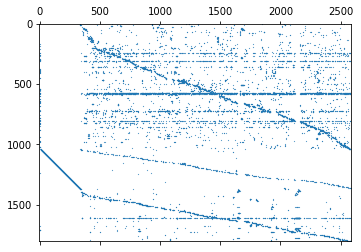

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(stoich_matrix, precision=0.01, markersize=.2)

<div class="alert alert-info">

**Question:** What are the diagonal and horizontal lines?
</div>
